# RNNs, Part 2


## RNN Recall

Reminder that RNNs are very good with sequence learning. 

For example text, audio, stock market 

For processing video, you'd process each frame with a CNN.  Create a sequence of each frame and pass it into the RNN to capture this. 

## Sequence Learning 

In an image, we don't want to learn different weights for every pixel 

Similarly in a sequence, we do not want to learn different weights for every token! 

- RNNs use a shared nerual network to update hidden state 
- Reuse the RNN module for every token 



## Recall Vanilla RNN 

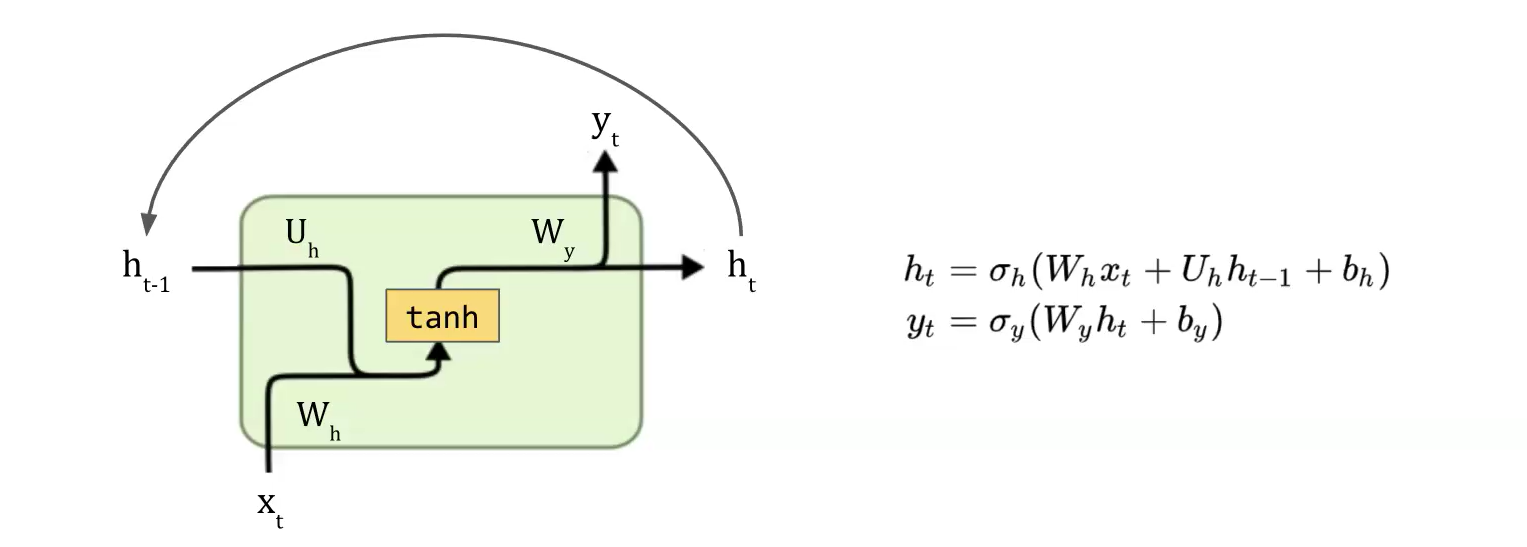

It has input at time t (token)

## Now recall Sequence-Level Predictions

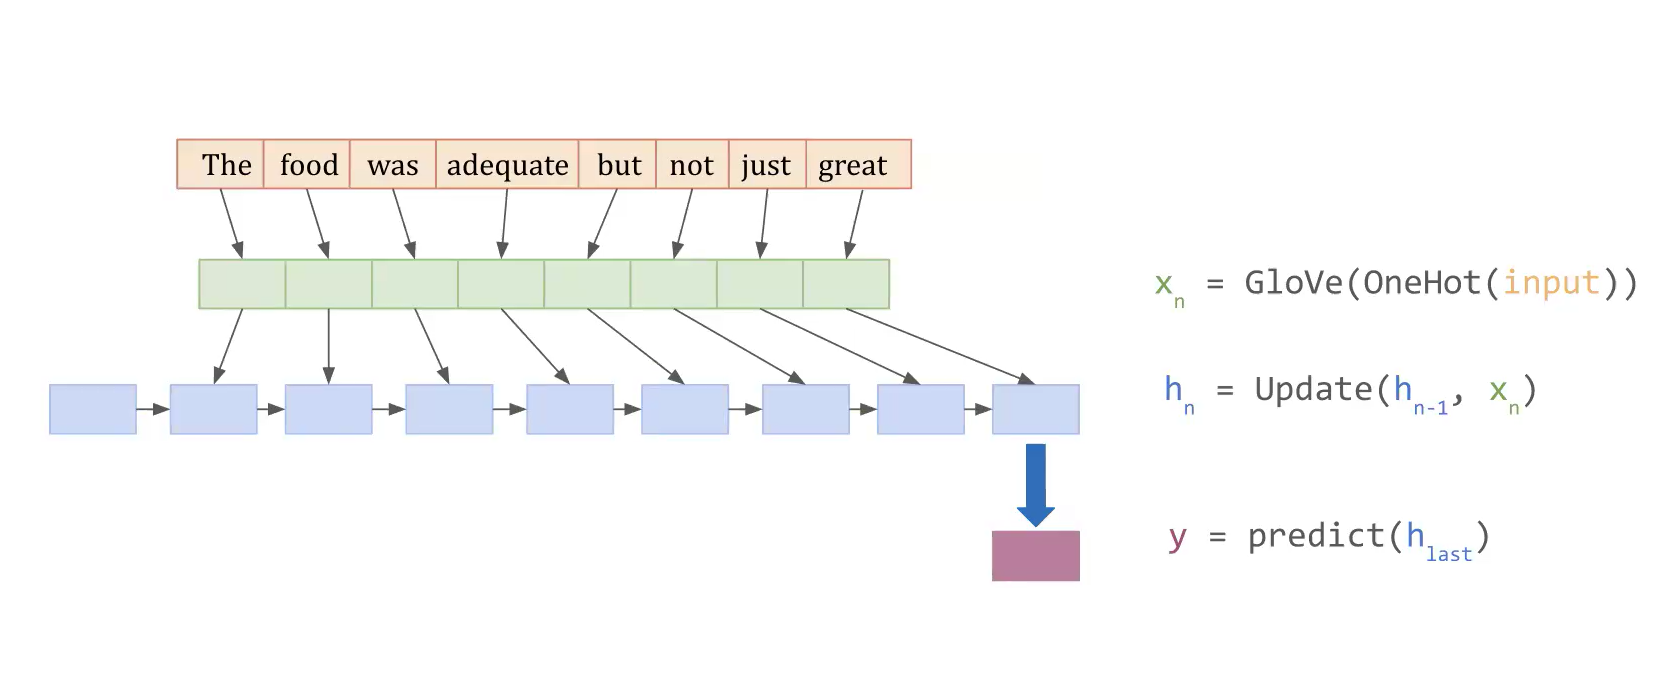

You have the RNN past through the whole sequence, then take the last hidden state. 

But there are times where you want to make predicts **per input**

For example, assigning a class per word, maybe the grammatical rules of the word. You would pass the hidden state of each time step into the classifier. 

## Limitations of Vanilla RNNs 

It SOUNDS ideal, but there are major technical issues 

What happens if RNNs unroll onto a long sequence? 

For deep RNNs, long-term dependencies are not captured well. 

Gradients will explode/vanish. 

### Why Exploding/Vanishing Gradients? 

Suppose update function is a simple linear model. 

$$
h_t = {W_h}{h_{t-1}}
$$

If we write this for all time steps

$$
h_t = {(W_h)^t}{h_0}
$$

However, if $|W_h| > 1$ --> Exploding gradients; $h_t → \infty$

However, if $|W_h| < 1$ --> Vanishing gradients; $h_t → 0$

It's very hard to maintain this close to 1, it's impractical!

### Realistically what can we do? 

#### Gradient Clipping --> Exploding Gradient 
- If gradient is greater than a threshold, set the gradient to threshold 

#### Skip Connection --> Vanishing Gradient 
- Ideally we want skip connections to all previous states

## LSTMs & GRUs

These architecture use a **gating mechanism**

### Gating Mechanism 
- Approximating skip-connections to all previous states by learning to **weight previous states differently** instead. You can think of these like soft skip-connections 
- The gates control how much information flows through 

$$
f(x) = X.{\sigma}(x)
$$

OR, if you want to be more complex 

$$
f(x) = X.NN(x)
$$



### LSTM 

This consists of **long-term memory** and **short-term memory**. 

There are three gates to updates the memories. 

Each gate is a small single-layer neural network. It takes the concatenation of current input and hidden state. Then, it's passed into a nonlinearity. 

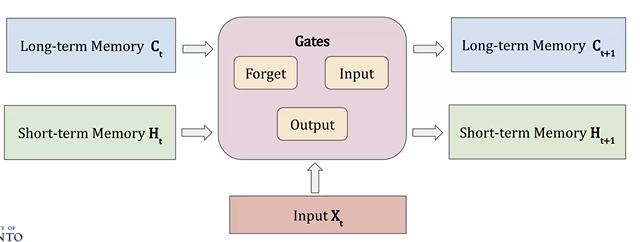

#### Forget Gate (Long-term memory)
How much of the past memory should we forget? 


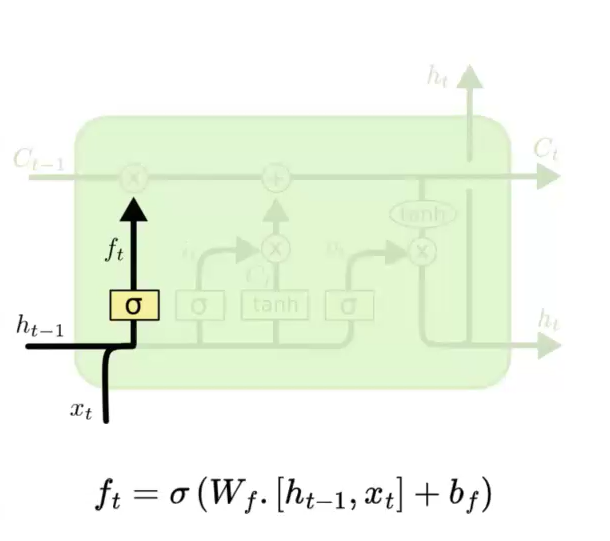
#### Input Gate 
How much of the current input should contribute to the memory? 

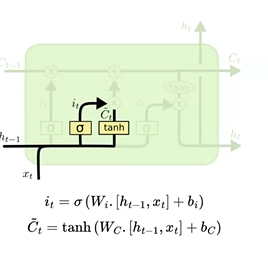

The other term is responsible for transforming and scaling that input. It will create a "transformed input" to the long term memory 

#### Updated long-term memory 

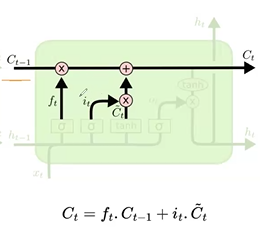

$f_t$ is essentially saying "how much of $C_{t-1}$ should be remembered"! That's why it's multiplied by the forget gate. 

#### Output Gate 
How much of the updated long-term memory should construct the short-term memory? 

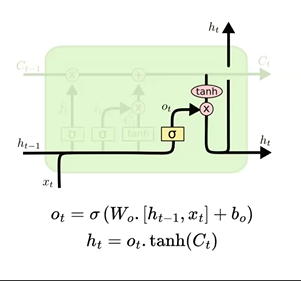

Passing the input and hidden state into another linear layer. Then, compute the next hidden state by multiplying the output gate. 

If $o_t$ is close to zero, very little bit of the long-term memory is kept. 




### Gated Recurrent Unit (GRU)

GRUs are more efficient than LSTMs while having similar performance, through two main simplifcations: 

1. Combine forget and input gates into an update gate. 

2. Merge cell state and hidden state 

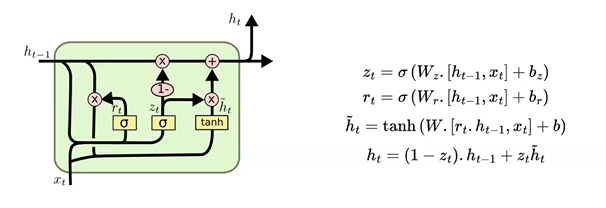

It kinda moves back to the way of Vanillas RNN

### Performance wise?

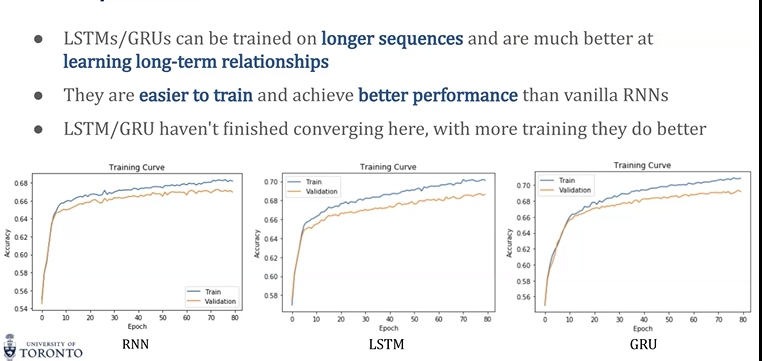

Note that LSTM and GRu has NOT plateaued! If you keep training you'll likley get better results. 

## PyTorch Implementation

For GRU, just change RNN to GRU 

For LSTM however, you need some extra lines for the long term and short-term memory

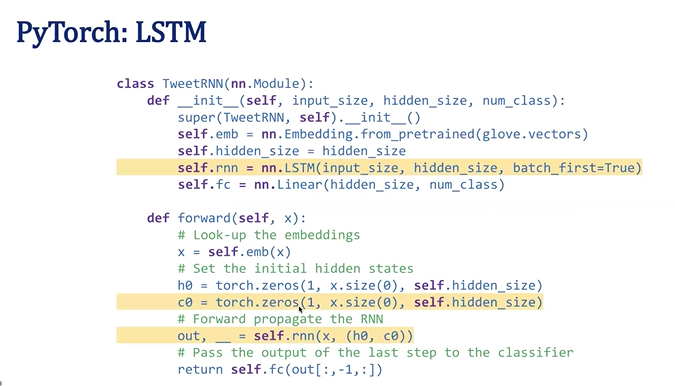

## Deep & Bidrectional RNNs

In DL of course we are trying to stack layers upon layers! 

We pass the input into the layer, then pass those onto layers 

A typical state in an RNN relies on the past and the present. 

In tasks such as machine translation, where a prediction depends on the past, present, and future. We can "exploit" the future to improve performance. 

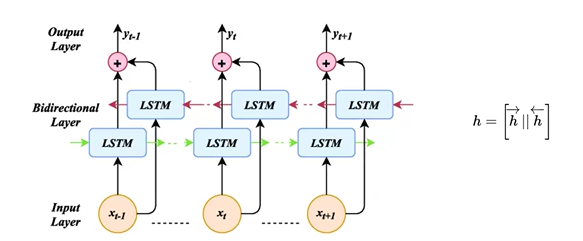

Here, we used 2 parallel RNNs. We take the hidden states of the two networks together, through concat 

Note that $x_t$ is passed into two LSTMs and aggregated. 



### Just direct stacking
We can also straight up stack RNN layers to learn more abstract representations. 

The hidden states close to the bottom (input) are better for syntactic tasks. 

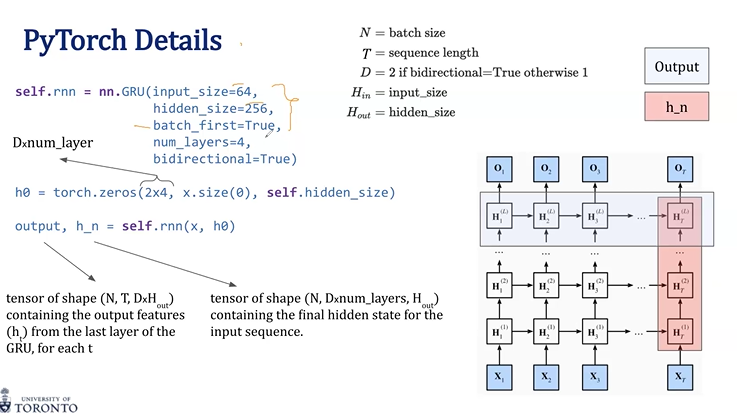

You NEED to double the amount of hidden states. 4 layers, with bidirecitonal layers. 

The first output is giving you a tensor of shape (N, T, DxHout) containing the output features from the LAST layer of the GRU. This is ALL the hidden states of the last layer 

The second output is ALL the last hidden states of all the layers. 


## Sequence-to-Sequence RNNs

Learning to generate new sequences requires addressing some problems. 

- How do we generate variable-length sequneces> 
- Training-time behavior must be changed --> This is teacher-forcing 
- Inference-time behavior also changes. 

### Autoregressive training 

Predict word 1, pass to model, predict word 2, pass to model, predict word 3

#### During Training Protocol --> Hwo do we know when to stop/finish a generated sequence? 

**\<BOS\> Beginning of Sequence**

**\<EOS\> End of Sequence**

Once the RNN generates \<EOS\>, we will know it's done generating! 

We also need to ensure these dedicated symbols have a low probability of being in the text. 

We pass \<BOS\> into the RNN, then geneate one word, then .... once it outputs \<ROS\>, it's done!

#### Defining the ground-truth and loss 
The RNN is trained to generate one particular sequence in the training set. 

- We feed the RNN with BOS and compare its prediction with I. The RNN's hidden state, pass it to a classifier with softmax. The possible output classes are all the possible words in your **dictionary**. Then, use CE to predict that with your original sequence. 

#### Teacher Forcing 
- In order to make training more efficient, we force the RNN to stay CLOSE to the ground-truth sequence. 

We pass the **ground truth label as the next input** instead of current prediction. We assume the perfect prediction (groiund truth labels) are made. 

#### During Inference 
Unlike classification, always selecting the token with the highest probability won't work well! 

We want DIVERSITY, not deterministic behavior. In practice this approach results in lots of grammatical errors. 

To address this, we **sample from the predicted distribution**. We will address 3 sampling strategies. 

- Greedy Search: Select the token with highest probability. However, this takes away diversity, and computationally expensive.  You are also not looking at joint probability. 

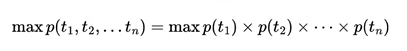

We DON'T use joint probability for all the tokens. 

- Beam Search: Look for sequence of tokens with the highest probability (JOINT!) within a window. 

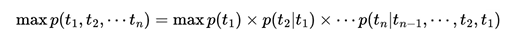

This gets expensive very quickly due to the sheer amount of combinations that would happen. 

- Softmax Temperature Scaling 

This is to help with the problem of over-confidence in neural networks by scaling the input logits to the softmax with a temperature. 

This is dividing the input by the temperature, then passing it into softmax. 

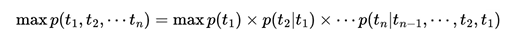

A higher temperature will make try to drive the distribution to nearly UNIFORM !

### Text Generator Example 

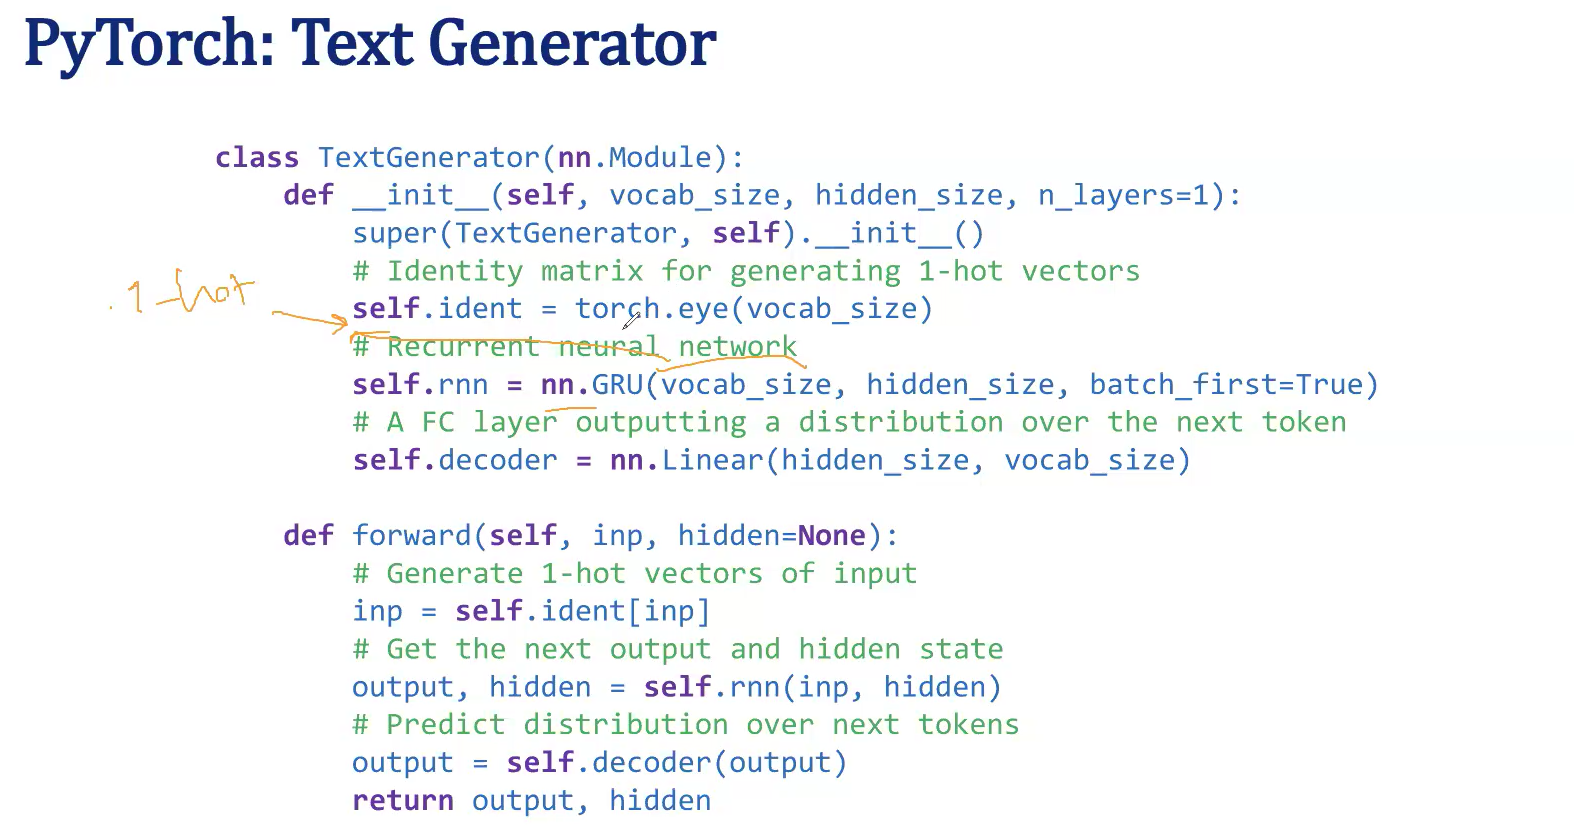

For example generating presidential tweets 

~20,000 Trump Tweets from 2018 

At most 140 characters, only keepthe text. 

We are to train an RNN that resembles Trump (wow)

**torch.eye** 

**inp:** This is to generate 1-hot embedding of all the words from our lookup table. 



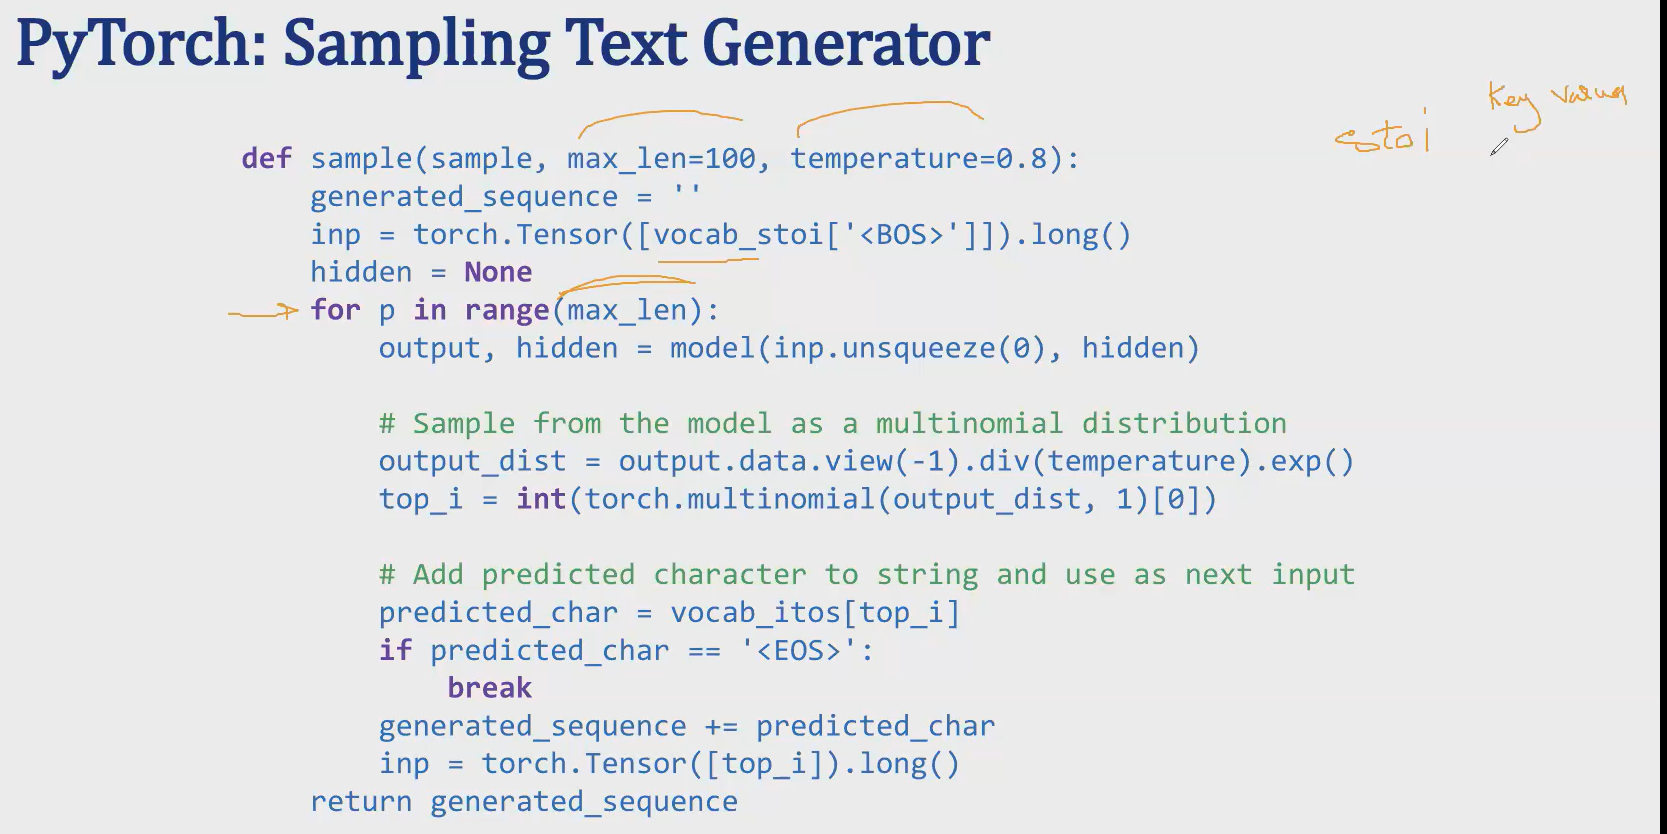

vocab_stoi is a string -> integer 

We start by passing \<BOS\> to get the integer for it

**torch.multinomial** Samples randomly from multinomial distribution. 

Then with this sampled integer, we convert it into string. 